<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_09/CAP417_HandsOn09_Barauna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# CAP 417 - PARTE C - HANDS-ON 01

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)



Bibliotecas e Comandos Necessários:

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import io
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.mlab as mlab
from scipy.stats import skew, kurtosis

%matplotlib inline

Importação das Séries Temporais para este notebook:

In [2]:
# #Importar um arquivo do seu desktop para o Colab

# #File from your computer:
from google.colab import files

#Downloading data
!gdown --id 1HuCXmgk2tKq4Bo6Uvl3m2-Bwhn2cLvgg
!gdown --id 1STW2t3V3MqJM9epEHje0eNZATSTjQrSL

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1HuCXmgk2tKq4Bo6Uvl3m2-Bwhn2cLvgg
To: /content/endo.csv
100% 30.7k/30.7k [00:00<00:00, 39.5MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1STW2t3V3MqJM9epEHje0eNZATSTjQrSL
To: /content/exo.csv
100% 31.8k/31.8k [00:00<00:00, 32.9MB/s]


In [3]:
dfendo = pd.read_csv('endo.csv')
dfexo = pd.read_csv('exo.csv')

## STEP01: 
Plotando a ST (com Opção de Média Zero)



In [4]:
#Opções de Normalização
#dx = (dx-min(dx))/(max(dx)-min(dx))
#Obs: Não é necessário neste hands-on

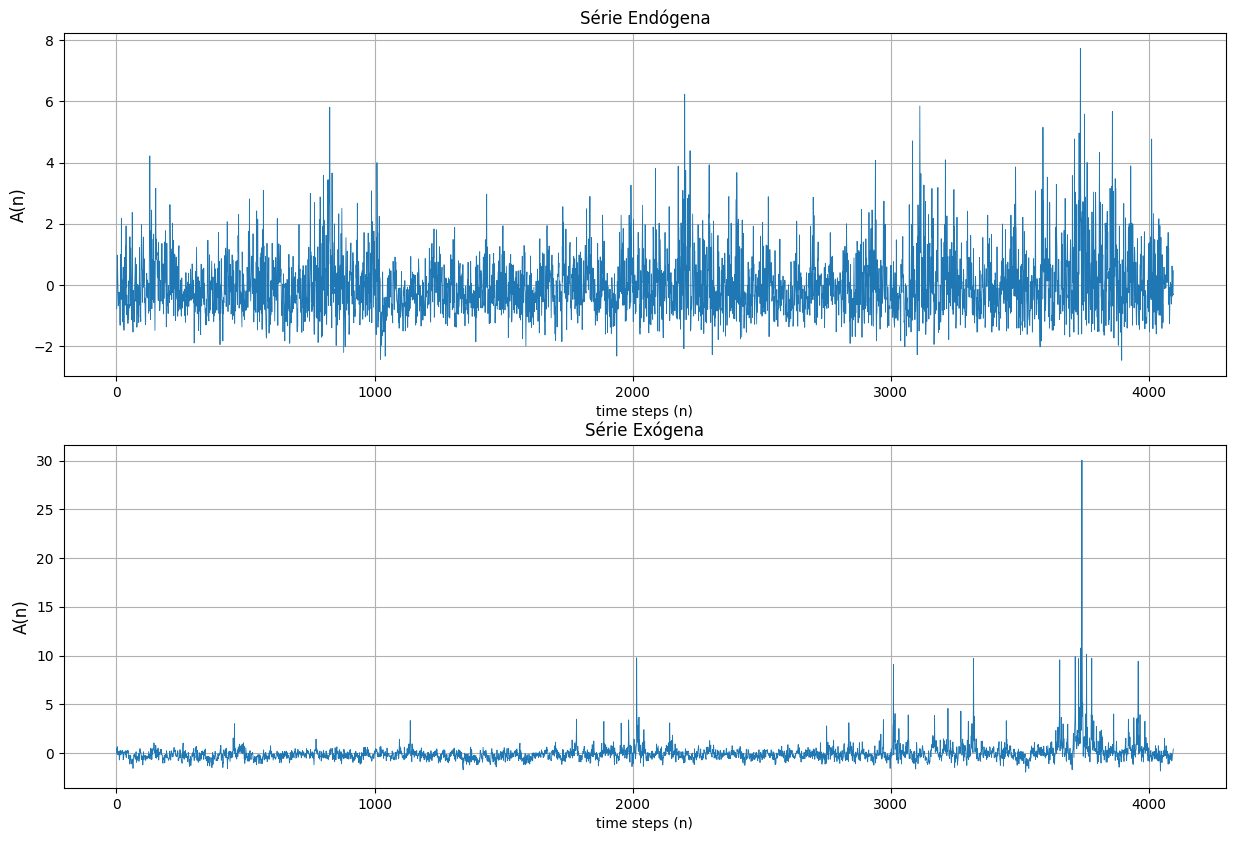

In [28]:
figure(figsize=(15,10),dpi=100)
dx=dfendo
dy=dfexo

plt.subplot(2,1,1)
end_norm = (dx - np.mean(dx))/np.std(dx) #Exógeno Normalizado
plt.plot(end_norm, linewidth=0.6)
plt.xlabel('time steps (n)')
plt.ylabel('A(n)', fontsize='large')
plt.title('Série Endógena')
plt.grid()

plt.subplot(2,1,2)
exo_norm=(dy - np.mean(dy))/np.std(dy) #Endógeno Normalizado
plt.plot(exo_norm, linewidth=0.6)
plt.xlabel('time steps (n)')
plt.ylabel('A(n)', fontsize='large')
plt.title('Série Exógena')

plt.grid()
plt.show()

## STEP 2: 
OBTER $3\sigma$ E REMOVER VALORES ACIMA DE $3\sigma$  


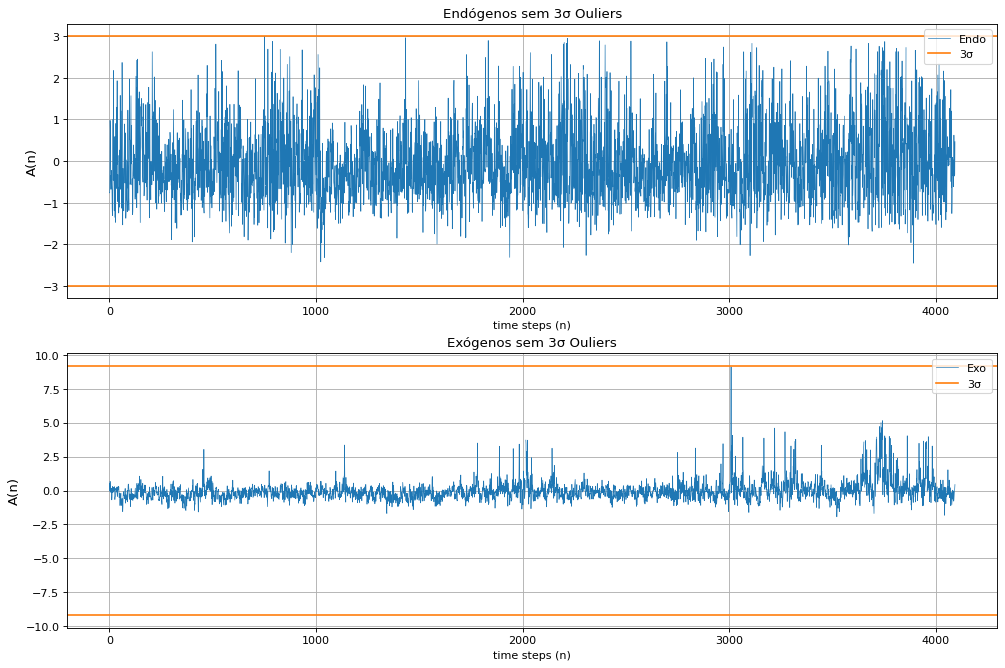

In [30]:
from matplotlib.pyplot import figure

### ENDO ###
#Identificação de σ
sigma_endo = float(np.std(end_norm))
#Remoção de 3σ
end_remov = end_norm[(end_norm <= 3*sigma_endo)]

### EXO ###
#Identificação de σ
sigma_exo = float(np.std(dy))
#Remoção de 3σ
exo_remov = exo_norm[(exo_norm <= 3*sigma_exo)]
#https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value


figure(figsize=(15,10),dpi=80)
plt.subplot(2,1,1)
plt.plot(end_remov, color="C0", linewidth=0.6,label='Endo')
plt.xlabel('time steps (n)')
plt.ylabel('A(n)', fontsize='large')
plt.axhline(y=3*sigma_endo,color='C1',label='3σ')
plt.axhline(y=-3*sigma_endo,color='C1')
plt.title('Endógenos sem 3σ Ouliers')
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(exo_remov, color="C0", linewidth=0.6,label='Exo')
plt.xlabel('time steps (n)')
plt.ylabel('A(n)', fontsize='large')
plt.axhline(y=3*sigma_exo,color='C1',label='3σ')
plt.axhline(y=-3*sigma_exo,color='C1')
plt.title('Exógenos sem 3σ Ouliers')
plt.grid()
plt.legend()

plt.show()

Veja exemplo na transparencia enviada ao final da aula 2. Nesse caso, teremos uma 2a ST a partir da 1a ST. A original e a outra sem as flutuações extremas.
Denomine essa 2a ST como dfendo2 ou dfexo2. Plote os histogramas para cada uma r calcule os momentos estatísticos K e S, seguindo os passos abaixo.  Note que teremos ao final 4 series temporais: dfendo e dfendo2, dexo e dexo2. 

In [7]:
#IMPLEMENTAR A IDENTIFICACAO E A EXTRAÇÃO DOS VALORES > 3SIGMA, 
#GERANDO A SEGUNDA SERIE SEM AS FLUTUAÇÕES EXTREMAS.

## STEP 3: 
HISTOGRAMA COM AJUSTE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

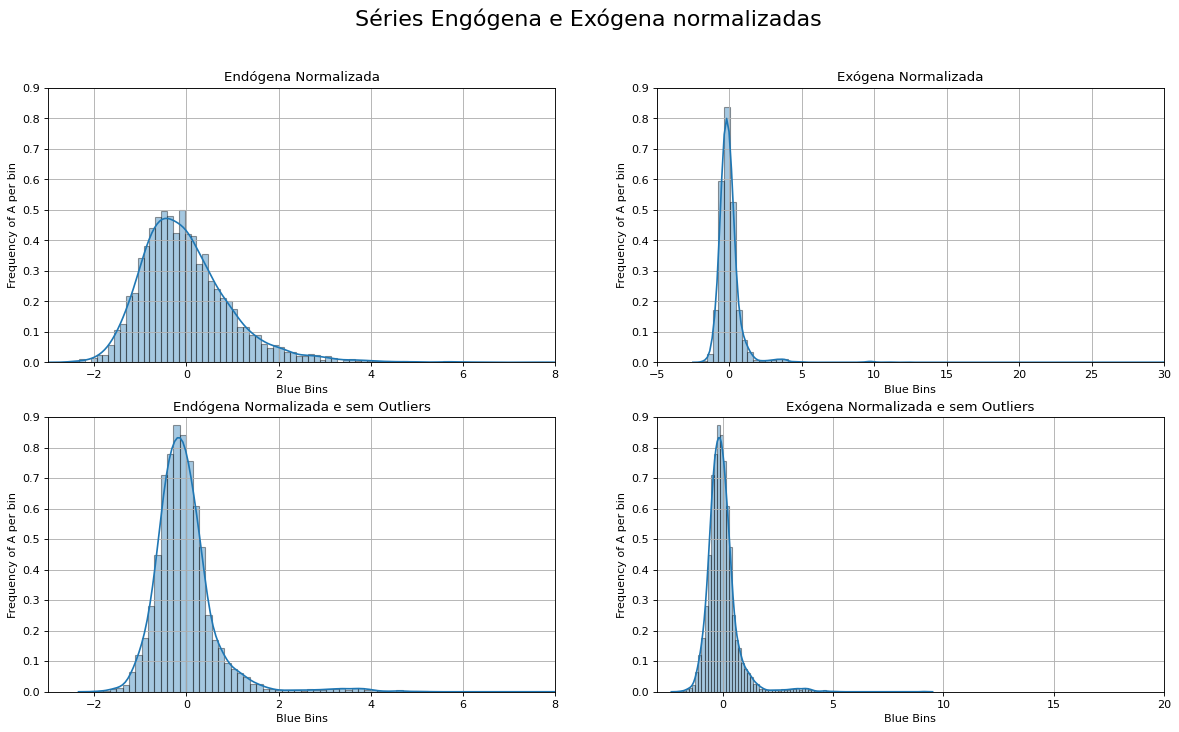

In [59]:
# seaborn histogram with Kernel Density Estimation
figure(figsize=(18,10),dpi=80)

plt.suptitle('Séries Engógena e Exógena normalizadas',size = 20)

plt.subplot(2,2,1)
sns.distplot(end_norm, bins=80, hist_kws={'edgecolor':'black'})
plt.ylabel('Frequency of A per bin')
plt.xlabel('Blue Bins')
plt.xlim(-3,8)
plt.ylim(0,.9)
plt.title('Endógena Normalizada')
plt.grid()


plt.subplot(2,2,2)
sns.distplot(exo_norm, bins=80, hist_kws={'edgecolor':'black'})
plt.ylabel('Frequency of A per bin')
plt.xlabel('Blue Bins')
plt.title('Exógena Normalizada')
plt.xlim(-5,30)
plt.ylim(0,.9)
plt.grid()

plt.subplot(2,2,3)
sns.distplot(exo_remov, bins=80, hist_kws={'edgecolor':'black'})
plt.ylabel('Frequency of A per bin')
plt.xlabel('Blue Bins')
plt.title('Endógena Normalizada e sem Outliers')
plt.xlim(-3,8)
plt.ylim(0,.9)
plt.grid()

plt.subplot(2,2,4)
sns.distplot(exo_remov, bins=80, hist_kws={'edgecolor':'black'})
plt.ylabel('Frequency of A per bin')
plt.xlabel('Blue Bins')
plt.title('Exógena Normalizada e sem Outliers')
plt.xlim(-3,20)
plt.ylim(0,.9)
plt.grid()

plt.show()


## STEP 4: 
CÁLCULO DOS MOMENTOS ESTATÍSTICOS E PLOTAGEM DOS PARAMETROS DE CULLEN-FREY ($K$ E $S^2$)

In [174]:
def momento_estat(df):
  from scipy.stats import skew, kurtosis
  index = df.columns[0]
  A=df[str(index)]
  #A=df
  m  = round(A.mean(),4)
  std= round(A.std(),4)
  s  = round(A.skew(),4)
  k1 = round(A.kurtosis(),4)
  k2 = round(k1+3,4)

  print("mean =            ", m, end='\n')
  print("std =             ", std, end='\n')
  print("skewness =        ", s, end='\n')
  print("Fisher Kurtosis = ", k1, end='\n')
  print("Pearson Kurtosis =", k2, end='\n\n')
  print()  

In [175]:
print('SERIE: ENDÓGENA')
momento_estat(dfendo)
print('SERIE: EXÓGENA')
momento_estat(dfexo)
print('SERIE: ENDÓGENA NORMALIZADA')
momento_estat(end_norm)
print('SERIE: EXÓGENA NORMALIZADA')
momento_estat(exo_norm)
print('SERIE: ENDÓGENA')
momento_estat(end_remov)
print('SERIE: EXÓGENA')
momento_estat(exo_remov)

SERIE: ENDÓGENA
mean =             1.001
std =              0.611
skewness =         1.3293
Fisher Kurtosis =  3.8565
Pearson Kurtosis = 6.8565


SERIE: EXÓGENA
mean =             0.9996
std =              3.0632
skewness =         10.4878
Fisher Kurtosis =  231.3377
Pearson Kurtosis = 234.3377


SERIE: ENDÓGENA NORMALIZADA
mean =             0.0
std =              1.0001
skewness =         1.3293
Fisher Kurtosis =  3.8565
Pearson Kurtosis = 6.8565


SERIE: EXÓGENA NORMALIZADA
mean =             0.0
std =              1.0001
skewness =         10.4878
Fisher Kurtosis =  231.3377
Pearson Kurtosis = 234.3377


SERIE: ENDÓGENA
mean =             -0.0545
std =              0.8854
skewness =         0.6643
Fisher Kurtosis =  0.4671
Pearson Kurtosis = 3.4671


SERIE: EXÓGENA
mean =             -0.0348
std =              0.7062
skewness =         2.8685
Fisher Kurtosis =  17.245
Pearson Kurtosis = 20.245




##STEP 5: 
CONSTRUA E PLOTE O ESPAÇO DE PARÂMETROS (KURTOSIS X QUADRADO DO SKEWNESS) COM OS RESPECTIVOS VALORES PARA ENDO.CSV (2 ST) E EXO.CSV (2 ST) (USE CORES DIFRENTES)

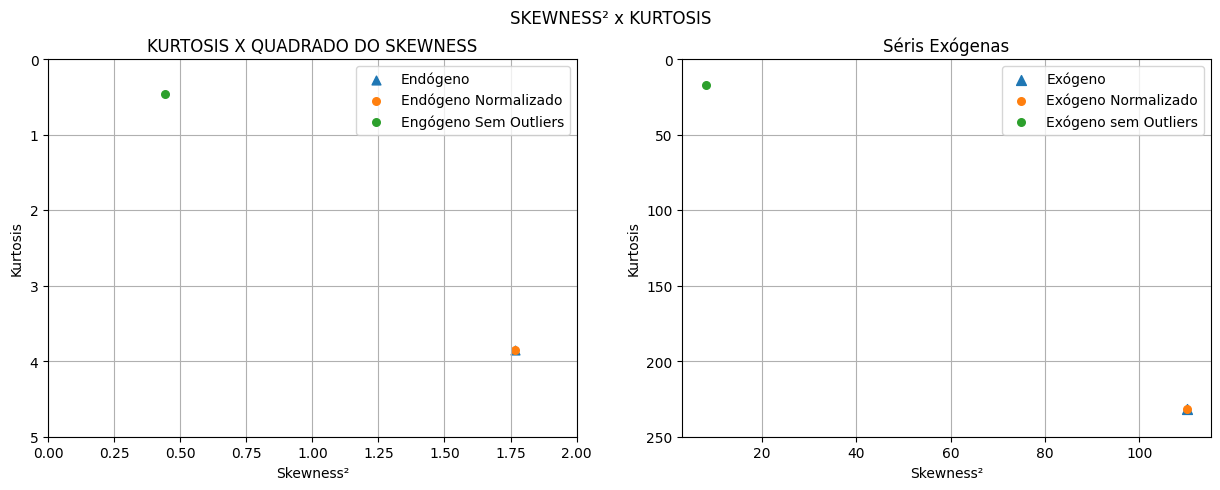

In [176]:
size = 30
figure(figsize=(15,5),dpi=100)

plt.suptitle('SKEWNESS² x KURTOSIS')

plt.subplot(1,2,1)
plt.scatter(dfendo.skew()**2
           ,dfendo.kurtosis()
           ,label='Endógeno'
           ,marker='^'    
           ,s=40)

plt.scatter(end_norm.skew()**2    
          ,(end_norm.kurtosis())      
          ,label='Endógeno Normalizado'
          ,s=size)

plt.scatter(end_remov.skew()**2   
           ,(end_remov.kurtosis())
           ,label='Engógeno Sem Outliers'
           ,s=size)
plt.legend()
plt.ylabel("Kurtosis")
plt.xlabel("Skewness²")
plt.title('KURTOSIS X QUADRADO DO SKEWNESS')
plt.xlim(0,2)
plt.ylim(5,0)
plt.grid()



plt.subplot(1,2,2)
plt.scatter(dfexo.skew()**2
            ,dfexo.kurtosis()
            ,label='Exógeno'
            ,marker='^'    ,s=50)
plt.scatter(exo_norm.skew()**2
           ,exo_norm.kurtosis()
           ,label='Exógeno Normalizado'
           ,s=size)
plt.scatter(exo_remov.skew()**2
           ,exo_remov.kurtosis()
           ,label='Exógeno sem Outliers'
           ,s=size)

plt.legend()
plt.ylabel("Kurtosis")
plt.xlabel("Skewness²")
plt.title('Séris Exógenas')
#plt.xlim(0,120)
plt.ylim(250,0)
plt.grid()

plt.show()